### Actividad 1 Modulo 7

##### La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y cuenta  con  otras  10.000  imágenes  que  sirven  para  evaluar  la  precisión  de nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas, donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.

#### 1.  Instale el ambiente de Tensorflow 

pip install tensorflow==2.12.0rc0

In [2]:
pip install opencv-python

                                              0.0/38.2 MB ? eta -:--:--
     -                                        1.2/38.2 MB 24.8 MB/s eta 0:00:02
     ---                                      3.7/38.2 MB 39.5 MB/s eta 0:00:01
     --------                                 7.9/38.2 MB 56.3 MB/s eta 0:00:01
     -----------                             11.0/38.2 MB 65.6 MB/s eta 0:00:01
     --------------                          13.9/38.2 MB 72.6 MB/s eta 0:00:01
     -----------------                       16.9/38.2 MB 65.6 MB/s eta 0:00:01
     --------------------                    19.9/38.2 MB 65.6 MB/s eta 0:00:01
     -----------------------                 22.9/38.2 MB 65.2 MB/s eta 0:00:01
     --------------------------              26.1/38.2 MB 65.2 MB/s eta 0:00:01
     -----------------------------           29.1/38.2 MB 65.6 MB/s eta 0:00:01
     ---------------------------------       32.3/38.2 MB 65.6 MB/s eta 0:00:01
     ------------------------------------    35.

#### 2.  Carga de la data 

In [1]:
import tensorflow as tf
from tensorflow import keras
#Usaremos datetime para nombrar archivos
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
# lo usaremos para reescalar imagen
import cv2
#verficamos la version de tensorflow tf 2.0
print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


#### 3.  Descripción de la base de datos

In [3]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo','Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

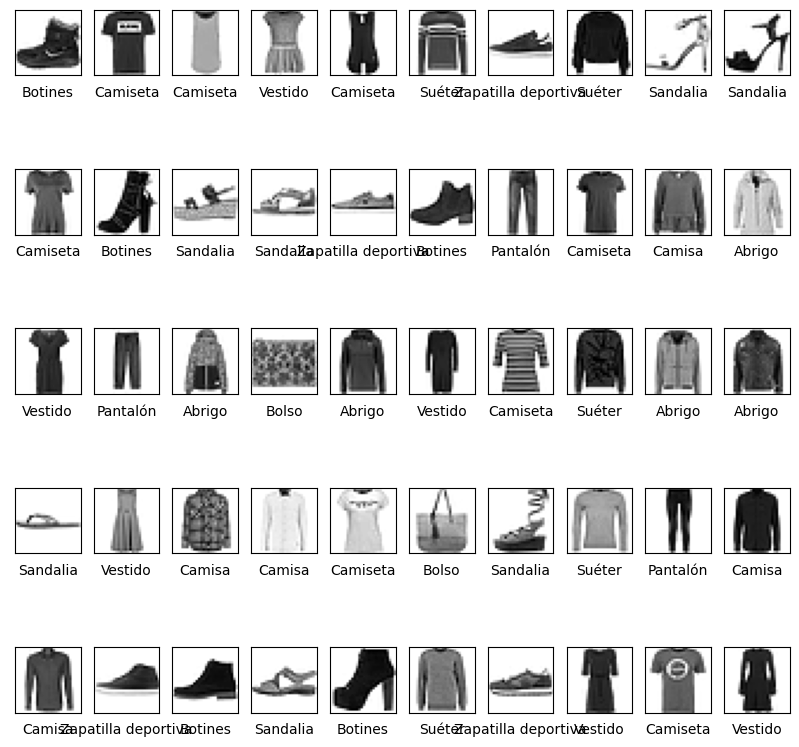

In [7]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
train_images = train_images / 255
test_images = test_images / 255

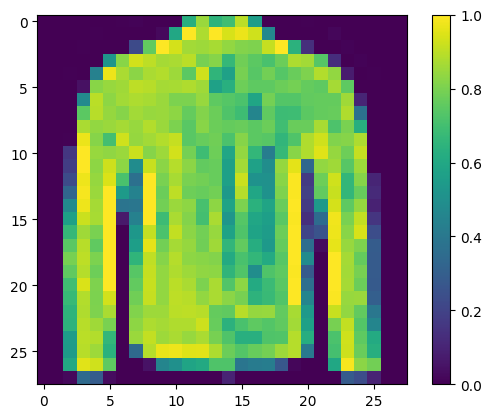

In [9]:
plt.figure()
plt.imshow(test_images[50])
plt.colorbar()
plt.grid(False)
plt.show()

#### 4.  Configuración de la red neuronal

In [10]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation=tf.nn.relu),
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### 5.  Compilación de la red neuronal 

In [12]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


#### 6.  Entrenamiento de la red

In [14]:
model.fit(train_images,
train_labels,
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4939 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


#### 7.  Predicción y conclusión.

In [18]:
predictions = model.predict(test_images)
img_predict = predictions[30]

313/313 [==============================] - 0s 1ms/step


In [19]:
img_predict =predictions[30]
print(img_predict)

[1.1813670e-14 1.5706587e-17 4.8610566e-17 5.3141590e-17 4.1507769e-12
 7.4367852e-16 4.0589164e-17 1.9490318e-13 1.0000000e+00 1.2267308e-16]


In [20]:
np.argmax(img_predict)

8

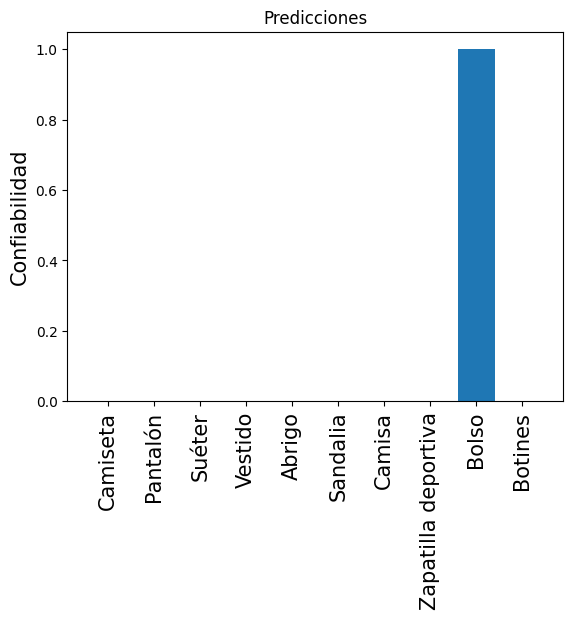

In [21]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

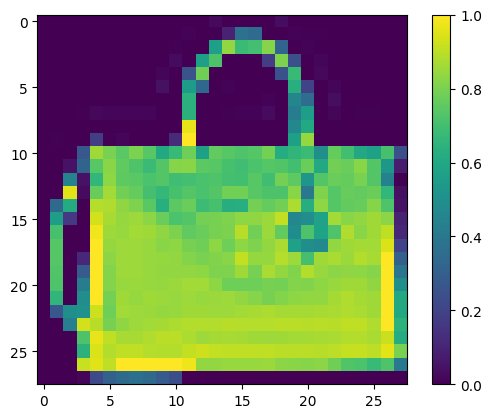

In [22]:
plt.figure()
plt.imshow(test_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

#### Como conclusion de este modelo